In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
series=pd.read_excel("Airlines+Data.xlsx", header=0, index_col=0,parse_dates=True)
series


,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


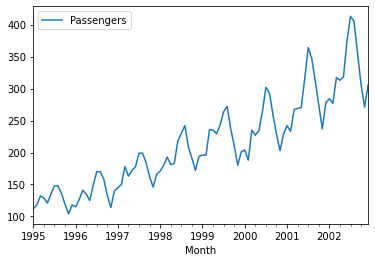

In [3]:
series.plot()
plt.show()

#### histogram and density plot

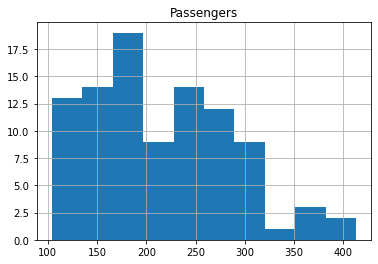

In [4]:
series.hist()
plt.show()

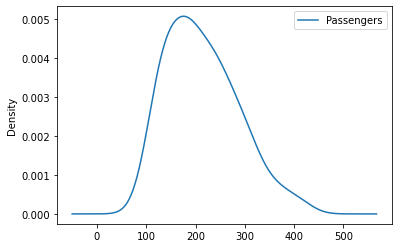

In [5]:
series.plot(kind='kde')
plt.show()

#### lagplot

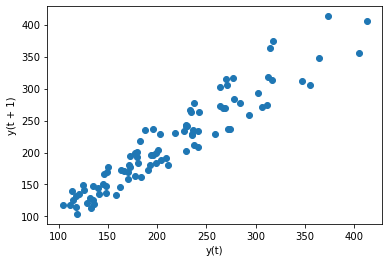

In [6]:
from pandas.plotting import lag_plot
lag_plot(series)
plt.show()

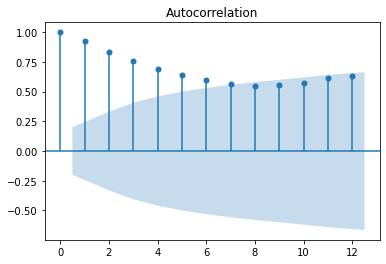

In [7]:
# auto-correlation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series,lags=12)
plt.show()

#### unsampling

In [8]:
from pandas import datetime

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [9]:
upsampled=series.resample('D').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


#### interpolation

            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


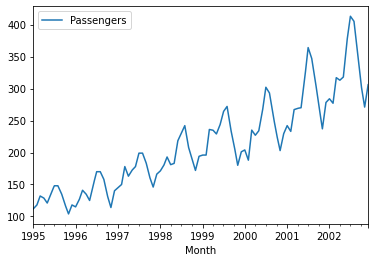

In [10]:
interpolated=upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
plt.show()

#### downsampling

In [11]:
resample=series.resample('Q')
quaterly_mean_passenger=resample.mean()
quaterly_mean_passenger

,Passengers
Month,
1995-03-31,120.666667
1995-06-30,128.333333
1995-09-30,144.000000
1995-12-31,113.666667
1996-03-31,127.333333
1996-06-30,136.333333
1996-09-30,166.000000
1996-12-31,129.000000
1997-03-31,157.666667


## transformation

#### squareroot transform

In [12]:
from numpy import sqrt

In [13]:
dataframe=pd.DataFrame(series.values)
dataframe.columns=['passengers']
dataframe['passengers']=sqrt(dataframe['passengers'])

In [14]:
dataframe

,passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


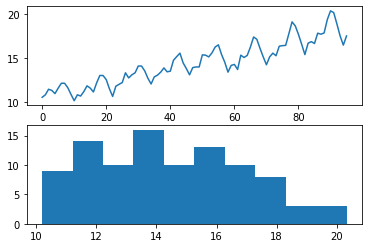

In [15]:
# line plot
plt.subplot(211)
plt.plot(dataframe['passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['passengers'])
plt.show()

#### log transform

In [16]:
from numpy import log

In [17]:
datframe=pd.DataFrame(series.values)
dataframe.columns=['passengers']
dataframe['passengers']=log(dataframe['passengers'])
dataframe

,passengers
0,2.359249
1,2.385342
2,2.441401
3,2.429906
4,2.397895
...,...
91,3.001944
92,2.936059
93,2.861793
94,2.801059


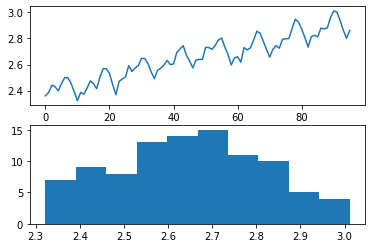

In [18]:
# line plot
plt.subplot(211)
plt.plot(dataframe['passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['passengers'])
plt.show()


            Passengers
Month                 
1995-03-31  120.666667
1995-06-30  128.333333
1995-09-30  144.000000
1995-12-31  113.666667
1996-03-31  127.333333


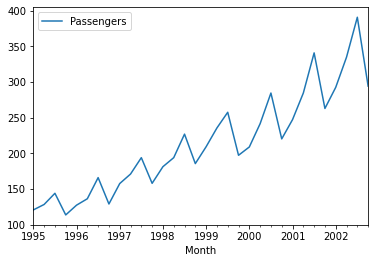

In [20]:
print(quaterly_mean_passenger.head())
quaterly_mean_passenger.plot()
plt.show()

In [28]:
import numpy as np
series['t']=np.arange(1,97)
series['t_sq']=series["t"]*series["t"]
series["log_passengers"]=np.log(series['Passengers'])
series

,Passengers,t,t_sq,log_passengers
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791
...,...,...,...,...
2002-08-01,405,92,8464,6.003887
2002-09-01,355,93,8649,5.872118
2002-10-01,306,94,8836,5.723585


In [29]:
#splitting data
train=series.head(76)
test=series.tail(20)

# forecasting using model based method

In [35]:
#linear model
import statsmodels.formula.api as smf
linear_model=smf.ols('Passengers~t',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

57.00014788256584

In [44]:
#exponential
Exp = smf.ols('log_passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.62154394719377

In [46]:
#quadratic
Quad = smf.ols('Passengers~t+t_sq',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.494274639472664

In [47]:
#Compare the results 
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,46.621544
0,rmse_linear,57.000148
2,rmse_Quad,58.494275


In [48]:
df1 = series.iloc[:,0:1]
df1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


# forecasting based on arima

In [50]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
train = pd.read_excel("Airlines+Data.xlsx", header=0, index_col=0, parse_dates=True)
X=train.values
X=X.astype('float32')
train_size=int(len(X)*0.50)
train, test = X[0:train_size], X[train_size:]

In [52]:
#walk-forward validation
history=[X for X in train]
predictions=list()
for i in range(len(test)):
    yhat=history[-1]
    predictions.append(yhat)
#observation
    obs=test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>Predicted=229.000, Expected=203.000
>Predicted=203.000, Expected=229.000
>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>

# arima hyperparameters

In [53]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse


# grid search cv for p.d.q values

In [54]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [55]:
# load dataset
train = pd.read_excel("Airlines+Data.xlsx", header=0, index_col=0, parse_dates=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [57]:
#Compare the results 
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_Arima"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,rmse_Arima,28.761954
1,rmse_Exp,46.621544
0,rmse_linear,57.000148
2,rmse_Quad,58.494275


# Based on the above results, Arima method is best method for forecasting¶

# Combine train and test data and build final model¶

In [63]:
df = pd.read_excel("Airlines+Data.xlsx", header=0, index_col=0, parse_dates=True)
# prepare data
X = df.values
X = X.astype('float32')

In [65]:
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()

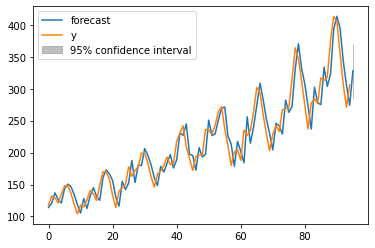

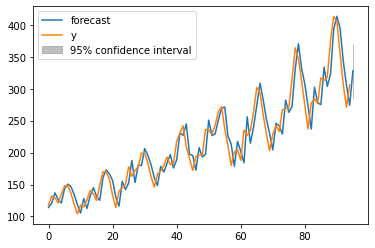

In [66]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,96)

In [67]:
forecast

array([327.97230431, 328.21292052, 324.77128415, 325.60479968,
       328.72974566, 331.51490639, 333.61640991, 335.58449554,
       337.68145063, 339.85310408])